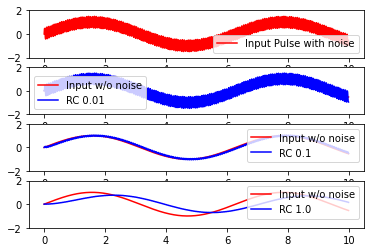

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def inPulseShape(t):
   p=np.sin(t)+0.5*np.sin(t*100.0)
   return  p

def yprime(y,t,RCvalue):
   yp=(inPulseShape(t)-y)/RCvalue
   return yp

def Euler(y0,t,RCvalue):
   n=len(t)
   yval=np.zeros(n)
   yval[0]=y0

   i=0
   while i < (n-1):
      tx=t[i]
      dt=t[i+1]-t[i]
      yval[i+1]=yval[i]+yprime(yval[i],tx,RCvalue)*dt
      i=i+1
   return yval

# ------------------------
# my program starts here
# ------------------------

y0=0.0
dt = 0.01
t = np.arange(0.0, 10.0, dt)

inPulse = inPulseShape(t)
inNoNoise = np.sin(t)

RCvalue=0.01
outEulerA = Euler(y0,t,RCvalue)

RCvalue=0.1
outEulerB = Euler(y0,t,RCvalue)

RCvalue=1.0
outEulerC = Euler(y0,t,RCvalue)


plt.subplot(4,1,1)
plt.plot(t,inPulse,'r',label='Input Pulse with noise')
plt.legend(loc='best')
plt.ylim(-2.0,2.0)


plt.subplot(4,1,2)
plt.plot(t,inNoNoise,'r',label='Input w/o noise')
plt.plot(t,outEulerA,'b',label='RC 0.01')
plt.legend(loc='best')
plt.ylim(-2.0,2.0)

plt.subplot(4,1,3)
plt.plot(t,inNoNoise,'r',label='Input w/o noise')
plt.plot(t,outEulerB,'b',label='RC 0.1')
plt.legend(loc='best')
plt.ylim(-2.0,2.0)

plt.subplot(4,1,4)
plt.plot(t,inNoNoise,'r',label='Input w/o noise')
plt.plot(t,outEulerC,'b',label='RC 1.0')
plt.legend(loc='best')
plt.ylim(-2.0,2.0)

plt.savefig("odeNoiseFilter.png")

plt.show()
